In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import math 

In [2]:
plt.style.use('seaborn-whitegrid')

In [3]:
SAVE_DIRECTORY = 'csv/'

In [4]:
red_df_list = []

In [5]:
red_num_list = []

In [6]:
group_num = int(input('Please enter the number of groups. : '))

In [7]:
for i in range(group_num):
    red_num = int(input('Please enter the number of red by' + str(i + 1) + 'groups. : '))
    red_num_list.append(red_num)
    red_df_list.append([])

In [8]:
# RedのCSVファイルを読み込み
for i in range(group_num):
    for j in range(red_num_list[i]):
        df = pd.read_csv(SAVE_DIRECTORY + 'red' + str(i + 1) + '-' + str(j + 1) + '.csv')
        red_df_list[i].append(df)

In [9]:
marker_df_list = []

In [10]:
for i in range(group_num):
    marker_df = pd.read_csv(SAVE_DIRECTORY + 'marker' + str(i + 1) + '.csv')
    marker_df_list.append(marker_df)

In [11]:
obstacle_num = int(input('Please enter the number of obstacle.'))

In [12]:

# マップ(全体)のCSVファイルの読み込み
obstacle_df_list = []
for i in range(obstacle_num):
  df = pd.read_csv(SAVE_DIRECTORY + 'obstacle' + str(i + 1) + '.csv')
  obstacle_df_list.append(df)

In [13]:
x_list = []
y_list = []
for i in range(group_num):
    x_list.append([])
    y_list.append([])
    for j in range(red_num_list[i]):
        x_list[i].append(red_df_list[i][j]['x'])
        y_list[i].append(red_df_list[i][j]['y'])

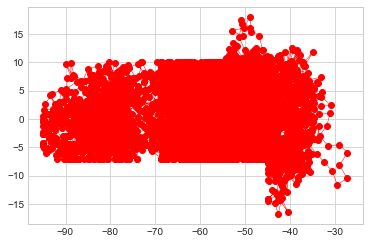

In [14]:
# ランダムウォークのみの出力
x = x_list[0][0]
y = y_list[0][0]
plt.plot(x, y, '-or', linewidth=0.5)
plt.show()

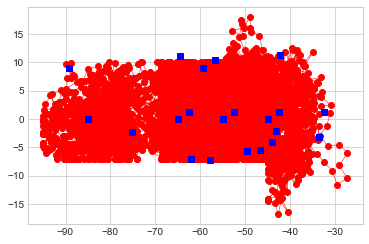

In [15]:
# マーカーを加えた出力
x = x_list[0][0]
y = y_list[0][0]
plt.plot(x, y, '-or', linewidth=0.5)
plt.plot(marker_df_list[0]['x'], marker_df_list[0]['y'], 'sb')
plt.show()

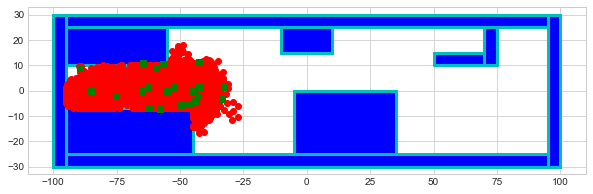

In [16]:
# 障害物を加えた出力
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
x = x_list[0][0]
y = y_list[0][0]
plt.plot(x, y, '-or', linewidth=0.5)
plt.plot(marker_df_list[0]['x'], marker_df_list[0]['y'], 'sg')

for i in range(obstacle_num):
        obstacle = patches.Rectangle(
            xy = (obstacle_df_list[i].iloc[0, 1], obstacle_df_list[i].iloc[0, 2]),
            width = obstacle_df_list[i].iloc[0, 5],
            height = obstacle_df_list[i].iloc[0, 4],
            angle = 0,
            facecolor = "b",
            edgecolor = "c",
            linewidth = 3,
            fill = True,
        )
        ax.add_patch(obstacle)

plt.show()

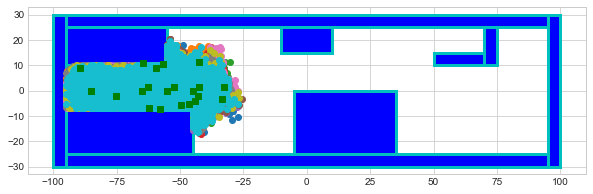

In [17]:
# Red複数台での出力
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, aspect="equal")

for i in range(group_num):
    for j in range(red_num_list[i]):
        plt.plot(x_list[i][j], y_list[i][j], '-o', linewidth=0.5)
    
    plt.plot(marker_df_list[i]['x'], marker_df_list[i]['y'], 'sg')


for i in range(obstacle_num):
        obstacle = patches.Rectangle(
            xy = (obstacle_df_list[i].iloc[0, 1], obstacle_df_list[i].iloc[0, 2]),
            width = obstacle_df_list[i].iloc[0, 5],
            height = obstacle_df_list[i].iloc[0, 4],
            angle = 0,
            facecolor = "b",
            edgecolor = "c",
            linewidth = 3,
            fill = True,
        )
        ax.add_patch(obstacle)

plt.show()

In [1242]:
# 動画の作成
%matplotlib nbagg
import itertools
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import animation

def _update(frame, x, y):
    plt.cla()
    for i in range(group_num):
        for j in range(red_num_list[i]):
            x[i][j].append(x_list[i][j][frame])
            y[i][j].append(y_list[i][j][frame])
    
    for i in range(group_num):
        for j in range(red_num_list[i]):
            plt.plot(x[i][j], y[i][j], '-o', linewidth=0.5)
    
        plt.plot(marker_df_list[i]['x'], marker_df_list[i]['y'], 'sg')
    
    for i in range(obstacle_num):
        obstacle = patches.Rectangle(
            xy = (obstacle_df_list[i].iloc[0, 1], obstacle_df_list[i].iloc[0, 2]),
            width = obstacle_df_list[i].iloc[0, 5],
            height = obstacle_df_list[i].iloc[0, 4],
            angle = 0,
            facecolor = "b",
            edgecolor = "c",
            linewidth = 3,
            fill = True,
        )
        ax.add_patch(obstacle)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
    plt.show()

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1, aspect="equal")

x = []
y = []
for i in range(group_num):
    x.append([])
    y.append([])
    for j in range(red_num_list[i]):
        x[i].append([])
        y[i].append([])

params = {
    'fig': fig,
    'func': _update,
    'fargs': (x, y),
    'interval': 10,
    'frames': np.arange(0, len(red_df_list[0][0]['step']), 1),
    'repeat': False,
}

anime = animation.FuncAnimation(**params)
anime.save('video/sim_video.gif', writer='pillow')

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

KeyboardInterrupt: 

In [ ]:
# 障害物がない場合の動画の作成
%matplotlib nbagg
import itertools
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import animation


def _update(frame, x, y):
    plt.cla()
    for i in range(red_num):
        x[i].append(x_list[i][frame])
        y[i].append(y_list[i][frame])
    
    for i in range(group_num):
        for j in range(red_num_list[i]):
            plt.plot(x_list[i][j], y_list[i][j], '-o', linewidth=0.5)
    
        plt.plot(marker_df_list[i]['x'], marker_df_list[i]['y'], 'sb')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
    plt.show()


fig = plt.figure(figsize=(16, 9))
x = []
y = []
for i in range(red_num):
    x.append([])
    y.append([])

params = {
    'fig': fig,
    'func': _update,
    'fargs': (x, y),
    'interval': 10,
    'frames': np.arange(0, len(red_df_list[0]['step']), 1),
    'repeat': False,
}

anime = animation.FuncAnimation(**params)
anime.save('video/sim_video_no_obstacle.gif', writer='pillow')

In [2]:
import numpy as np
from scipy.stats import multivariate_normal

# 学習パターン
X1 = np.array([[4, 5], [5, 4], [6, 6]])
X2 = np.array([[4, 2], [3, 2], [2, 5]])

# テストパターン
X_test = np.array([3.6, 3.6])

# クラス1の平均ベクトルと共分散行列の推定
m1 = np.mean(X1, axis=0)
cov1 = np.cov(X1.T)

# クラス2の平均ベクトルと共分散行列の推定
m2 = np.mean(X2, axis=0)
cov2 = np.cov(X2.T)

# 事前確率
prior_prob = 0.5

# 2次元正規分布のオブジェクトの作成
dist1 = multivariate_normal(mean=m1, cov=cov1)
dist2 = multivariate_normal(mean=m2, cov=cov2)

# 事後確率の計算
posterior_prob1 = dist1.pdf(X_test) * prior_prob
posterior_prob2 = dist2.pdf(X_test) * prior_prob

# クラスの判定
predicted_class = 1 if posterior_prob1 > posterior_prob2 else 2

print(f"テストパターン {X_test} はクラス {predicted_class} に属します。")

テストパターン [3.6 3.6] はクラス 1 に属します。


In [ ]:
# マーカーの移動の様子を出力